In [902]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score,classification_report,r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

# Project
## Social Media Engagement ML Predictive Analysis 

In [903]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\social_media_engagement1.csv")

# Data Info

In [904]:
df.shape

(100, 9)

In [905]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   post_id          100 non-null    int64 
 1   platform         100 non-null    object
 2   post_type        100 non-null    object
 3   post_time        100 non-null    object
 4   likes            100 non-null    int64 
 5   comments         100 non-null    int64 
 6   shares           100 non-null    int64 
 7   post_day         100 non-null    object
 8   sentiment_score  100 non-null    object
dtypes: int64(4), object(5)
memory usage: 7.2+ KB


In [906]:
df.head()

,post_id,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score
0,1,Facebook,image,8/17/2023 14:45,2121,474,628,Thursday,positive
1,2,Facebook,carousel,5/14/2023 0:45,3660,432,694,Sunday,neutral
2,3,Instagram,poll,2/21/2023 16:15,4955,408,688,Tuesday,negative
3,4,Twitter,image,11/16/2023 0:45,1183,90,187,Thursday,negative
4,5,Twitter,video,5/23/2023 0:30,3499,247,286,Tuesday,positive


# Data Handling & Cleaning

In [907]:
df["post_time"]=pd.to_datetime(df["post_time"])

In [908]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [909]:
df.drop(columns=["post_id"],inplace=True)

In [910]:
# Adding extra column to understand better engagement ( including=total likes,comments and shares)
df["total_engagement"]=df["likes"]+df["comments"]+df["shares"]
df.head()
df["post_date"]=df["post_time"].dt.date
df['post_times'] = pd.to_datetime(df['post_time'], format='%H:%M:%S').dt.time
df.head()

,platform,post_type,post_time,likes,comments,shares,post_day,sentiment_score,total_engagement,post_date,post_times
0,Facebook,image,2023-08-17 14:45:00,2121,474,628,Thursday,positive,3223,2023-08-17,14:45:00
1,Facebook,carousel,2023-05-14 00:45:00,3660,432,694,Sunday,neutral,4786,2023-05-14,00:45:00
2,Instagram,poll,2023-02-21 16:15:00,4955,408,688,Tuesday,negative,6051,2023-02-21,16:15:00
3,Twitter,image,2023-11-16 00:45:00,1183,90,187,Thursday,negative,1460,2023-11-16,00:45:00
4,Twitter,video,2023-05-23 00:30:00,3499,247,286,Tuesday,positive,4032,2023-05-23,00:30:00


In [911]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   platform          100 non-null    object        
 1   post_type         100 non-null    object        
 2   post_time         100 non-null    datetime64[ns]
 3   likes             100 non-null    int64         
 4   comments          100 non-null    int64         
 5   shares            100 non-null    int64         
 6   post_day          100 non-null    object        
 7   sentiment_score   100 non-null    object        
 8   total_engagement  100 non-null    int64         
 9   post_date         100 non-null    object        
 10  post_times        100 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 8.7+ KB


In [912]:
df["post_year"]=df["post_time"].dt.year
df["post_month"]=df["post_time"].dt.month
df["post_hour"]=df["post_time"].dt.hour
df["post_minute"]=df["post_time"].dt.minute

In [913]:
df["post_day"]=df["post_time"].dt.day

In [914]:
df.drop(columns=["post_time","post_date","post_times"],inplace=True)

In [915]:
df.head()

,platform,post_type,likes,comments,shares,post_day,sentiment_score,total_engagement,post_year,post_month,post_hour,post_minute
0,Facebook,image,2121,474,628,17,positive,3223,2023,8,14,45
1,Facebook,carousel,3660,432,694,14,neutral,4786,2023,5,0,45
2,Instagram,poll,4955,408,688,21,negative,6051,2023,2,16,15
3,Twitter,image,1183,90,187,16,negative,1460,2023,11,0,45
4,Twitter,video,3499,247,286,23,positive,4032,2023,5,0,30


## Data Preprocessing

In [916]:
cat_cols=df[['platform', 'post_type','post_day','sentiment_score']]

In [917]:
le=LabelEncoder()
for col in cat_cols:
    df[col]=le.fit_transform(df[col])

## Correlation Heatmap

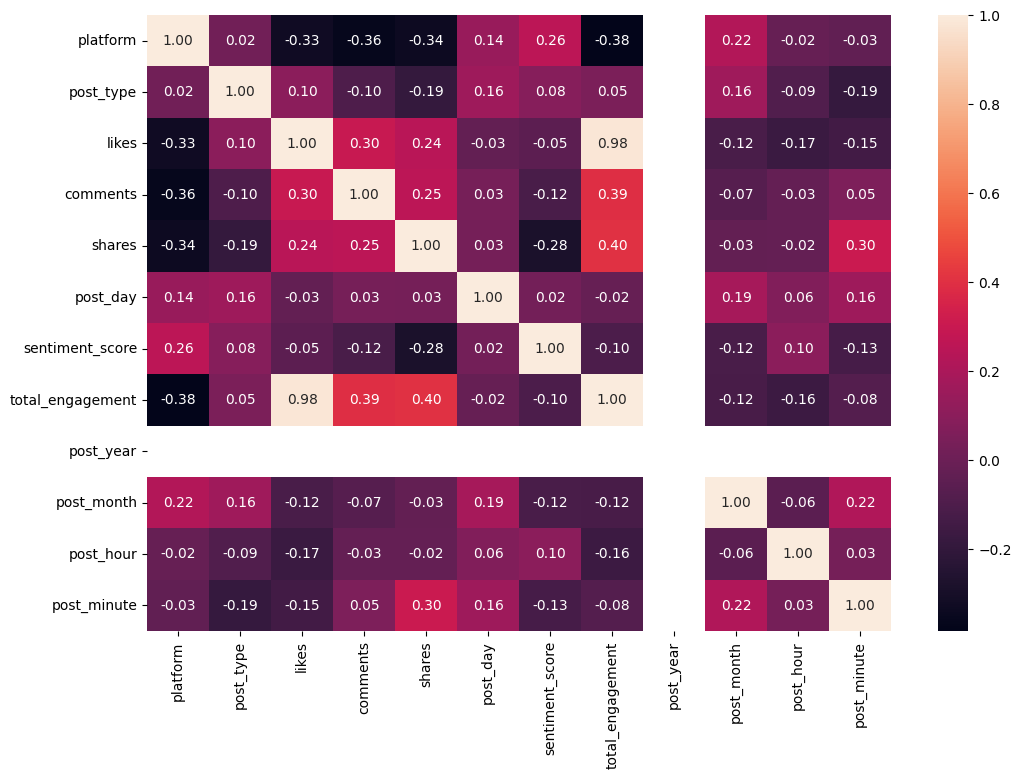

In [918]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(),annot=True,fmt=".2f")
plt.show()

# Machine Learning

## Lineae Regression Model

In [919]:
df.head()

,platform,post_type,likes,comments,shares,post_day,sentiment_score,total_engagement,post_year,post_month,post_hour,post_minute
0,0,1,2121,474,628,16,2,3223,2023,8,14,45
1,0,0,3660,432,694,13,1,4786,2023,5,0,45
2,1,2,4955,408,688,20,0,6051,2023,2,16,15
3,2,1,1183,90,187,15,0,1460,2023,11,0,45
4,2,4,3499,247,286,22,2,4032,2023,5,0,30


In [920]:
x=df.drop(columns=["total_engagement"])
y=df["total_engagement"]

In [921]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
model_lr=LinearRegression()
model_lr.fit(x_train_scaled,y_train)

LinearRegression()

In [922]:
y_pred=model_lr.predict(x_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred)

print(f"The Linear Regression Evaluation Scores Are:")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")

The Linear Regression Evaluation Scores Are:
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R² Score: 1.00


<Axes: xlabel='total_engagement'>

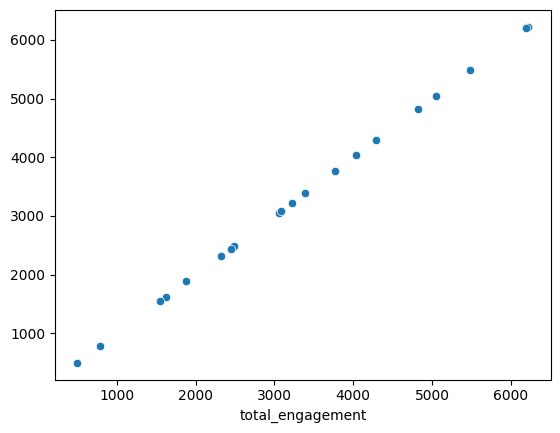

In [923]:
sns.scatterplot(x=y_test,y=y_pred)

## Random Forest Regressor Model 

In [924]:
model_rf=RandomForestRegressor()
model_rf.fit(x_train,y_train)

RandomForestRegressor()

In [925]:
y_pred_rf=model_rf.predict(x_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"The Random Forest Regressor Evaluation Scores Are:")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")


The Random Forest Regressor Evaluation Scores Are:
MAE: 326.66
MSE: 135505.02
RMSE: 368.11
R² Score: 0.95


<Axes: xlabel='total_engagement'>

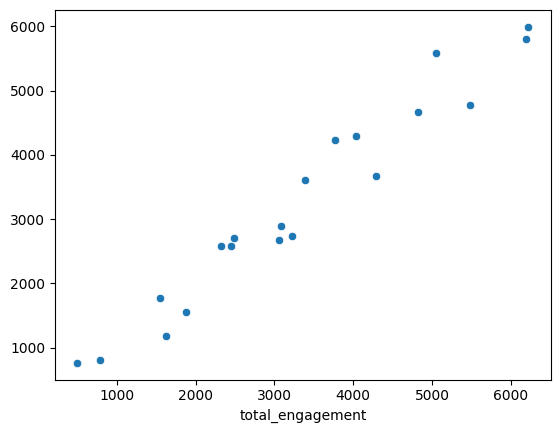

In [926]:
sns.scatterplot(x=y_test,y=y_pred_rf)

## XGB Regressor Model

In [927]:
model_x=XGBRegressor()
model_x.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [928]:
y_pred_x=model_x.predict(x_test)
mae_x = mean_absolute_error(y_test, y_pred_x)
mse_x = mean_squared_error(y_test, y_pred_x)
rmse_x = np.sqrt(mse_x)
r2_x = r2_score(y_test, y_pred_x)

print(f"The XGBoost Regressor Evaluation Scores Are:")
print(f"MAE: {mae_x:.2f}")
print(f"MSE: {mse_x:.2f}")
print(f"RMSE: {rmse_x:.2f}")
print(f"R² Score: {r2_x:.2f}")


The XGBoost Regressor Evaluation Scores Are:
MAE: 247.46
MSE: 84765.02
RMSE: 291.14
R² Score: 0.97


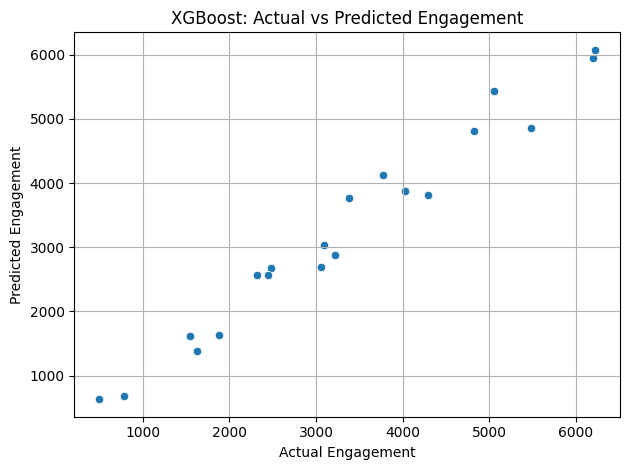

In [929]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=y_test, y=y_pred_x)
plt.xlabel("Actual Engagement")
plt.ylabel("Predicted Engagement")
plt.title("XGBoost: Actual vs Predicted Engagement")
plt.grid(True)
plt.tight_layout()
plt.show()


## K-Neighbours Regressor Model 

In [930]:
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(x_train, y_train)

KNeighborsRegressor()

In [931]:
y_pred_knn = model_knn.predict(x_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN Regressor Evaluation Scores:")
print(f"MAE: {mae_knn:.2f}")
print(f"MSE: {mse_knn:.2f}")
print(f"RMSE: {rmse_knn:.2f}")
print(f"R² Score: {r2_knn:.2f}")


KNN Regressor Evaluation Scores:
MAE: 199.08
MSE: 56402.98
RMSE: 237.49
R² Score: 0.98


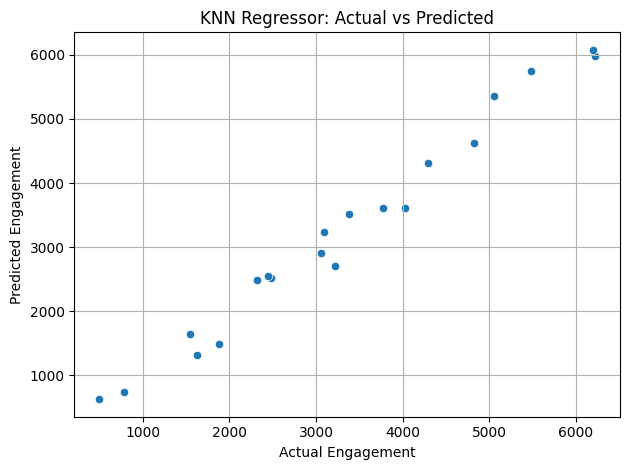

In [932]:
sns.scatterplot(x=y_test, y=y_pred_knn)
plt.xlabel("Actual Engagement")
plt.ylabel("Predicted Engagement")
plt.title("KNN Regressor: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

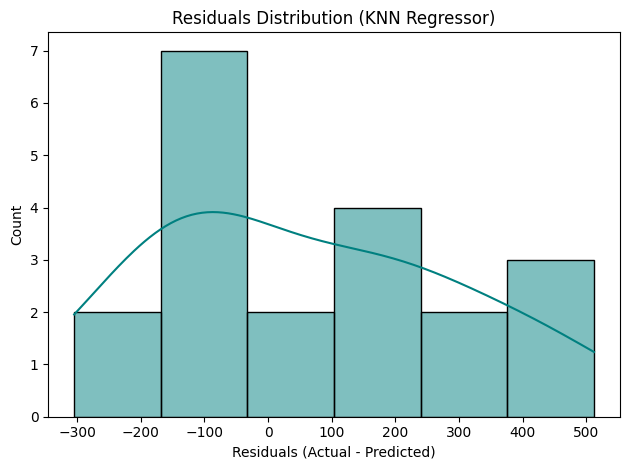

In [933]:
residuals = y_test - y_pred_knn
sns.histplot(residuals, kde=True, color='teal')
plt.title("Residuals Distribution (KNN Regressor)")
plt.xlabel("Residuals (Actual - Predicted)")
plt.tight_layout()
plt.show()


## Interactive Prediction Visualization

In [934]:
import plotly.express as px
df_plot = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})
fig = px.scatter(df_plot, x='Actual', y='Predicted',
                 title='KNN Regressor: Actual vs Predicted',
                 trendline='ols', color_discrete_sequence=['royalblue'])
fig.show()
